# 정리

In [ ]:
from urllib import request
from bs4 import BeautifulSoup
url ="https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%ED%94%84%EB%9E%91%EC%8A%A4"
html=request.urlopen(url).read()
html # ctrl F  찾기 
soup= BeautifulSoup(html, 'html.parser')
soup.find_all("title")
title3 = soup.select( ".tit_main.fn_tit_u")# 앞에 있는 점은 class 중간 점은 띄어쓰기 \
title3                                     # 아이디를 가져올 때는 # 
                                           # class = . select에서는 
# select_one 하나만 찾음 select 다찾음 
driver =webdriver.Chrome("chromedriver.exe")
url1='https://search.naver.com/search.naver?where=image&sm=tab_jum&query=bts'
driver.get(url1) # 이거하고 어느정도 받아올때까지 기다려야함
html=driver.page_source
driver.close()
from urllib.request import urlopen, urlretrieve
count =0
for image in images:
    with urlopen(image['src']) as f:
        with open(f"./bts/{count}.jpg", "wb") as h:
            data=f.read()
            h.write(data)
            count +=1 
count =0
for image in images:
    urlretrieve(image['src'], f"./bts/{count}.jpg")
    count +=1 
from urllib.parse import quote_plus
url1='https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url2=quote_plus("블랙핑크")
url= url1 +url2
print(url)

In [1]:
추천 시스템의 3가지 필터링 
1. 아이템 기반, 최근접 이웃, 잠재 요인 

크롤링 하거나 데이터를 받아올 때 겉보기엔 리스트나 딕셔너리 형태지만 해당 타입이 문자열로 되어있어 
원하는 데이터에 접근하기 어려운 경우가 빈번하게 생긴다고 한다. 
이를 해당하는 파이썬 객체로 알맞게 변형시켜주는 함수는 무엇인가?

literal_eval()

SVD는 추천 예측을 해주는 알고리즘으로 행렬분해를 해서 사용자들과 아이템들에 대한 각각의 잠재 요인을 
분석하여 사용자가 사용하지 않은 아이템에 대한 데이터를 예측한다.

추천 시스템은 콘텐츠기반 방식과 협업필터링 방식으로 나뉜다. 

사람마다 평가를 주는 기준이 다릅니다. 이것을 반영하는 평점을 무엇이라고 하는가요?
베이스라인 평점 

평점 분석에서 왜곡된 평점 데이터를 회피하도록 평점에 평가횟수를 반영하는 평가 방식이다. - 가중 평점 


추천시스템의 3가지 방법 콘텐츠 기반,  협업필터링(최근접 이웃, 잠재요인)

전체 데이터에 대해 예측할 때 사용하는 test()
개별 유저의 평점을 예측할 때 사용하는 predict() 

SyntaxError: invalid syntax (207113205.py, line 1)

In [3]:
import pandas as pd
df = pd.DataFrame({"UserID" : ['User1', 'User1', 'User2', 'User2', 'User3', 'User4'],
                   "ItemID" : ['Item1', 'Item3', 'Item1', 'Item2', 'Item4', 'Item2'], 
                   "Rating" : [3, 3, 4, 1, 2, 5]}) 
df

,UserID,ItemID,Rating
0,User1,Item1,3
1,User1,Item3,3
2,User2,Item1,4
3,User2,Item2,1
4,User3,Item4,2
5,User4,Item2,5


In [5]:
 df.pivot_table('Rating', index='UserID', columns='ItemID')

ItemID,Item1,Item2,Item3,Item4
UserID,,,,
User1,3.0,NaN,3.0,NaN
User2,4.0,1.0,NaN,NaN
User3,NaN,NaN,NaN,2.0
User4,NaN,5.0,NaN,NaN


In [6]:
SVD, SVD++, NMF, Slope One

SyntaxError: invalid syntax (4047254913.py, line 1)

In [19]:
st = '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [10]:
from ast import literal_eval   
dict_series = literal_eval(st)    
[i['name'] for i in dict_series]  

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [15]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

text = 'I decided, very early on, just to accept life unconditionally.I never expected it to do anything special for me, yet I seemed to accomplish far more than I had ever hoped. Most of the time it just happened to me withoutmy ever seeking it.'

senti_anal =SentimentIntensityAnalyzer()
senti_anal.polarity_scores(text)

{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.8658}

In [16]:
neg : 부정 감성 지수
neu : 중립적인 감성 지수
pos : 긍정 감성 지수
compound : neg, neu, pos score를 적절히 조합한 -1 ~ 1 사이의 감성 지수 

SyntaxError: invalid syntax (1730248877.py, line 1)

In [17]:
import pandas as pd
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

ratings = pd.read_csv('./ratings.csv')
reader = Reader(rating_scale = (0.5,5.0)) 
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)
trainset, testset = train_test_split(data, test_size=0.25)
model = SVD(n_epochs=50, n_factors=50) 


In [22]:
del str
model.fit(trainset)
predict_preds = model.predict(str(196), str(302))
predict_preds[3]

3.501626403268674

In [23]:
model.fit(trainset)
test_preds = model.test(testset)
accuracy.rmse(test_preds)

RMSE: 0.8933


0.8933019038500293

In [24]:
model.fit(trainset)
predict_preds =model.predict(str(196), str(302))
predict_preds[3]

3.501626403268674

In [26]:
from urllib import request
from bs4 import BeautifulSoup


In [56]:
url ="https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%ED%94%84%EB%9E%91%EC%8A%A4"
html=request.urlopen(url).read()
html # ctrl F  찾기 
soup= BeautifulSoup(html, 'html.parser')
soup.find_all("title")

[<title>프랑스 : 네이버 뉴스검색</title>]

In [63]:
type(html)

bytes

In [64]:
title=soup.find_all(class_ = "news_tit")
soup.find(class_ = "news_tit")

<a class="news_tit" href="https://www.yna.co.kr/view/AKR20221026075100530?input=1195m" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=880000D8_000000000000000013533293&amp;g=001.0013533293&amp;u='+urlencode(this.href));" target="_blank" title="개인정보위, 국제 개인정보기구 협의체 참석…프랑스와 업무협약">개인정보위, 국제 개인정보기구 협의체 참석…<mark>프랑스</mark>와 업무협약</a>

In [65]:
title[0].text

'개인정보위, 국제 개인정보기구 협의체 참석…프랑스와 업무협약'

In [66]:
for i in title: # i가 title 0번 1번 다 지정해줌 
    print(i.text)

개인정보위, 국제 개인정보기구 협의체 참석…프랑스와 업무협약
'보성 차·쌀' 프랑스 통해 유럽시장 진출 시동
SK지오센트릭, 플라스틱 재활용 사업 프랑스 이어 중국 진출도 본격화
천안시, 프랑스 기업과 5천만 달러 규모 ‘투자협약’ 체결
'2022 프랑스 바티맛 건축박람회'...국내 건자재 중소기업 수출 '청신호'
마리 프랑스 취댕 노바티스 사장과 악수하는 오세훈 시장
천안시, 프랑스 기업과 660억원 규모 투자협약
몽생미셸 천년, 피카소 서거 50주년… “프랑스가 韓 여행객을 기다립니다”
숭실대 GTEP사업단, 프랑스 파리 SIAL 참가해 현장 계약 52만 달러 달성
에어프랑스, 기차 연계 여행 ‘트레인+에어’ 서비스 강화


In [67]:
title[0].attrs['href']

'https://www.yna.co.kr/view/AKR20221026075100530?input=1195m'

In [68]:
title[0]['href']

'https://www.yna.co.kr/view/AKR20221026075100530?input=1195m'

In [69]:
for i in title: # i가 title 0번 1번 다 지정해줌 
    print(i.text , ':' , i.attrs['href'])

개인정보위, 국제 개인정보기구 협의체 참석…프랑스와 업무협약 : https://www.yna.co.kr/view/AKR20221026075100530?input=1195m
'보성 차·쌀' 프랑스 통해 유럽시장 진출 시동 : https://www.news1.kr/articles/4844744
SK지오센트릭, 플라스틱 재활용 사업 프랑스 이어 중국 진출도 본격화 : http://www.edaily.co.kr/news/newspath.asp?newsid=01420246632497184
천안시, 프랑스 기업과 5천만 달러 규모 ‘투자협약’ 체결 : http://www.breaknews.com/931126
'2022 프랑스 바티맛 건축박람회'...국내 건자재 중소기업 수출 '청신호' : http://www.newspim.com/news/view/20221027000124
마리 프랑스 취댕 노바티스 사장과 악수하는 오세훈 시장 : https://www.yna.co.kr/view/PYH20221027002700004?input=1196m
천안시, 프랑스 기업과 660억원 규모 투자협약 : http://www.newsis.com/view/?id=NISX20221026_0002061890&cID=10807&pID=10800
몽생미셸 천년, 피카소 서거 50주년… “프랑스가 韓 여행객을 기다립니다” : https://www.donga.com/news/article/all/20221026/116173227/1
숭실대 GTEP사업단, 프랑스 파리 SIAL 참가해 현장 계약 52만 달러 달성 : http://edu.donga.com/?p=article&ps=view&at_no=20221026104031835035
에어프랑스, 기차 연계 여행 ‘트레인+에어’ 서비스 강화 : http://news.heraldcorp.com/view.php?ud=20221026000115


In [70]:
type(title)

bs4.element.ResultSet

In [71]:
type(soup)

bs4.BeautifulSoup

In [72]:
print(title[0].string)

None


## daum

In [377]:
url1='https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%ED%94%84%EB%9E%91%EC%8A%A4'

In [378]:
html1= request.urlopen(url1).read() # 다못블러옴 
html1

b'<script type="text/javascript">\nlocation.replace( "https://ncaptcha.search.daum.net/captcha/show?redirect=http%3A%2F%2Fsearch.daum.net%2Fsearch%3Fw%3Dnews%26nil_search%3Dbtn%26DA%3DNTB%26enc%3Dutf8%26cluster%3Dy%26cluster_page%3D1%26q%3D%25ED%2594%2584%25EB%259E%2591%25EC%258A%25A4" );\n</script>\n'

In [75]:
soup=BeautifulSoup(html1, 'lxml')
soup

<html><head><script type="text/javascript">
location.replace( "https://ncaptcha.search.daum.net/captcha/show?redirect=http%3A%2F%2Fsearch.daum.net%2Fsearch%3Fw%3Dnews%26nil_search%3Dbtn%26DA%3DNTB%26enc%3Dutf8%26cluster%3Dy%26cluster_page%3D1%26q%3D%25ED%2594%2584%25EB%259E%2591%25EC%258A%25A4" );
</script>
</head></html>

In [76]:
title1 = soup.find_all(class_ = "news_tit")
title1

[]

In [77]:
len(title1)

0

### 네이버 

In [78]:
import requests

In [379]:
url ="https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%ED%94%84%EB%9E%91%EC%8A%A4"

html2 =requests.get(url).text
html2

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="프랑스 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'프랑스\'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="\'프랑스\'의 네이버 뉴스검색 결과입니다."> <title>프랑스 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_221027.css"> <link rel="stylesheet" type="text/css" href

In [82]:
soup=BeautifulSoup(html2,  'html.parser')
soup #

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="프랑스 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'프랑스'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'프랑스'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>프랑스 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_221006.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net/sstatic

In [84]:
title1 = soup.find_all(class_ = "news_tit")
title1

[<a class="news_tit" href="https://www.yna.co.kr/view/AKR20221026075100530?input=1195m" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=1&amp;i=880000D8_000000000000000013533293&amp;g=001.0013533293&amp;u='+urlencode(this.href));" target="_blank" title="개인정보위, 국제 개인정보기구 협의체 참석…프랑스와 업무협약">개인정보위, 국제 개인정보기구 협의체 참석…<mark>프랑스</mark>와 업무협약</a>,
 <a class="news_tit" href="https://www.news1.kr/articles/4844744" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=4&amp;i=08138263_000000000000000006418297&amp;g=421.0006418297&amp;u='+urlencode(this.href));" target="_blank" title="'보성 차·쌀' 프랑스 통해 유럽시장 진출 시동">'보성 차·쌀' <mark>프랑스</mark> 통해 유럽시장 진출 시동</a>,
 <a class="news_tit" href="http://www.edaily.co.kr/news/newspath.asp?newsid=01420246632497184" onclick="return goOtherCR(this, 'a=nws*a.tit&amp;r=9&amp;i=880000E7_000000000000000005351258&amp;g=018.0005351258&amp;u='+urlencode(this.href));" target="_blank" title="SK지오센트릭, 플라스틱 재활용 사업 프랑스 이어 중국 진출도 본격화">SK지오센트릭, 플라스틱 재활용 사업 <mark>프랑스</mark> 이어 중국 

### 다음

In [92]:
header= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}

In [93]:
html2 =requests.get(url, headers=header).text # 네이버에서는 header 없어도 가능, 
html2      # header은 나는 기계 아니예요 이다. 사용자이에요이다.

'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="프랑스 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'프랑스\'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="\'프랑스\'의 네이버 뉴스검색 결과입니다."> <title>프랑스 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_221006.css"> <link rel="stylesheet" type="text/css" href

In [109]:
url1= 'https://search.daum.net/search?w=news&nil_search=btn&DA=NTB&enc=utf8&cluster=y&cluster_page=1&q=%EB%AF%B8%EA%B5%AD'
html3 =requests.get(url1, headers=header).text # 다음에서는 header있어야함 , 
html3     # header은 나는 기계 아니예요 이다. 사용자이에요이다.

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<!doctype html>\n<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="win chrome">\n<head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n<meta name="autocomplete" content="off" />\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no" />\n<meta property="og:title" content="미국 &ndash; Daum 검색" />\n<meta property="og:url" content="https://search.daum.net/search?w=news&q=%EB%AF%B8%EA%B5%AD" />\n<meta property="og:description" content="Daum 검색에서 미국에 대한 최신정보를 찾아보세요." />\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" />\n<meta property="og:site_name" content="다음검색" />\n<title>미국 &ndash; Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="D

In [111]:
soup =BeautifulSoup(html3, 'lxml')
soup


<!DOCTYPE html>

<html class="win chrome" lang="ko" xmlns="http://www.w3.org/1999/xhtml">
<head profile="http://a9.com/-/spec/opensearch/1.1/">
<meta content="text/html;charset=utf-8" http-equiv="content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="off" name="autocomplete"/>
<meta content="always" name="referrer"/>
<meta content="telephone=no" name="format-detection">
<meta content="미국 – Daum 검색" property="og:title"/>
<meta content="https://search.daum.net/search?w=news&amp;q=%EB%AF%B8%EA%B5%AD" property="og:url"/>
<meta content="Daum 검색에서 미국에 대한 최신정보를 찾아보세요." property="og:description"/>
<meta content="https://search1.daumcdn.net/search/statics/common/img/og_search.png" property="og:image"/>
<meta content="다음검색" property="og:site_name"/>
<title>미국 – Daum 검색</title>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="Daum" type="application/opensearchdescription+xml"/>
<link charset="utf-8" href="//search1.daumcdn.net/search/statics/common

In [126]:
title3 = soup.find_all(class_ = "tit_main fn_tit_u")
title3

[<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221026140906800?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26PqI-u4MHx258F1ae&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26PqI-u4MHx258F1ae", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}});' target="_blank">싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 <b>미국</b>"</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027030701102?f=o" onclick='smartLog(this, "dc=NNS&amp;d=2621uJ6aLY2j43mVQX&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16bOiOx4gG2S18EPLj&amp;e3=0&amp;ext=dsid=2621uJ6aLY2j43mVQX", event, {"cpid": {"value": "16bOiOx4gG2S18EPLj"}});' target="_blank">“한국에서 <b>미국</b> 주립대 학위 받아요.”</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027091500124?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26L6vEZ4jGwJwsOiMO&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26L6vEZ4jGwJwsOiMO", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}})

In [113]:
for i in title3:
    print(i.text)

싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국"
“한국에서 미국 주립대 학위 받아요.”
김정은, 미국선거 노리고 7차 핵실험 버튼 누르나
중간선거, 미국의 선택은
캐나다가 먼저 금리인상 속도조절 나섰다…미국도 추종할까?
[표] 국내투자자 미국 주식투자 상위 종목(26일)
"미국도 얼어붙었다"…美 새집 판매 뚝 떨어졌다
싱하이밍 “북핵 묵인 안 해”…미국엔 작심 비판
트럼프 천기누설…언론인에게 '미국 비밀 핵무기' 브리핑
미국 법무부, 오거스타내셔널·USGA·PGA 오브 아메리카도 반독점 조사


In [114]:
[i.text for i in title3]

['싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국"',
 '“한국에서 미국 주립대 학위 받아요.”',
 '김정은, 미국선거 노리고 7차 핵실험 버튼 누르나',
 '중간선거, 미국의 선택은',
 '캐나다가 먼저 금리인상 속도조절 나섰다…미국도 추종할까?',
 '[표] 국내투자자 미국 주식투자 상위 종목(26일)',
 '"미국도 얼어붙었다"…美 새집 판매 뚝 떨어졌다',
 '싱하이밍 “북핵 묵인 안 해”…미국엔 작심 비판',
 "트럼프 천기누설…언론인에게 '미국 비밀 핵무기' 브리핑",
 '미국 법무부, 오거스타내셔널·USGA·PGA 오브 아메리카도 반독점 조사']

## select

In [116]:
title3 = soup.select( ".tit_main.fn_tit_u")# 앞에 있는 점은 class 중간 점은 띄어쓰기 \
title3                                     # 아이디를 가져올 때는 # 
                                           # class = . select에서는 
# select_one 하나만 찾음 select 다찾음 

[<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221026140906800?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26PqI-u4MHx258F1ae&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26PqI-u4MHx258F1ae", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}});' target="_blank">싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 <b>미국</b>"</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027030701102?f=o" onclick='smartLog(this, "dc=NNS&amp;d=2621uJ6aLY2j43mVQX&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16bOiOx4gG2S18EPLj&amp;e3=0&amp;ext=dsid=2621uJ6aLY2j43mVQX", event, {"cpid": {"value": "16bOiOx4gG2S18EPLj"}});' target="_blank">“한국에서 <b>미국</b> 주립대 학위 받아요.”</a>,
 <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221027091500124?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26L6vEZ4jGwJwsOiMO&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26L6vEZ4jGwJwsOiMO", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}})

In [120]:
title3 = soup.select("#newsColl > div.cont_divider > ul > li:nth-child(1) > div.wrap_cont > a")# 앞에 있는 점은 class 중간 점은 띄어쓰기 \
title3   # 검사창에서 오른쪽 마우스 copy들어가서 select 하면됨 

[<a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221026140906800?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26PqI-u4MHx258F1ae&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26PqI-u4MHx258F1ae", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}});' target="_blank">싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 <b>미국</b>"</a>]

In [123]:
title3 = soup.select("#newsColl > div.cont_divider > ul ")# 앞에 있는 점은 class 중간 점은 띄어쓰기 \
title3 

[<ul class="list_news"> <li> <div class="wrap_thumb" id="news_img_0"> <a class="thumb_bf" href="http://v.media.daum.net/v/20221026140906800?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26PqI-u4MHx258F1ae&amp;pg=1&amp;r=1&amp;p=1&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26PqI-u4MHx258F1ae", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}});' target="_blank"> <img alt="" data-size="116x80" height="80" onerror="SF.errorImage(this)" src="https://search1.kakaocdn.net/argon/232x160_85_c/HQ6HJr0VsMm0" width="116"/> </a> </div> <div class="wrap_cont"> <a class="tit_main fn_tit_u" href="http://v.media.daum.net/v/20221026140906800?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26PqI-u4MHx258F1ae&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16iL25JCNSvhQN0hEU&amp;e3=0&amp;ext=dsid=26PqI-u4MHx258F1ae", event, {"cpid": {"value": "16iL25JCNSvhQN0hEU"}});' target="_blank">싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 <b>미국</b>"</a> <p class="desc">핵심요약 관훈토론서 작심 비판 "<b>미국</b>은 자기가 정의, 세계의 우두머리 자처""중국은 타국 체제 존중, 

In [127]:
title3 = soup.find_all(class_ = "tit_main fn_tit_u")

for i in title3:
    print(i.text ,':', i.attrs['href'])

싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국" : http://v.media.daum.net/v/20221026140906800?f=o
“한국에서 미국 주립대 학위 받아요.” : http://v.media.daum.net/v/20221027030701102?f=o
김정은, 미국선거 노리고 7차 핵실험 버튼 누르나 : http://v.media.daum.net/v/20221027091500124?f=o
중간선거, 미국의 선택은 : http://v.media.daum.net/v/20221026075237684?f=o
캐나다가 먼저 금리인상 속도조절 나섰다…미국도 추종할까? : http://v.media.daum.net/v/20221027093357884?f=o
[표] 국내투자자 미국 주식투자 상위 종목(26일) : https://cp.news.search.daum.net/p/124963450
"미국도 얼어붙었다"…美 새집 판매 뚝 떨어졌다 : http://v.media.daum.net/v/20221027101806957?f=o
싱하이밍 “북핵 묵인 안 해”…미국엔 작심 비판 : http://v.media.daum.net/v/20221026215911165?f=o
트럼프 천기누설…언론인에게 '미국 비밀 핵무기' 브리핑 : http://v.media.daum.net/v/20221026154617316?f=o
미국 법무부, 오거스타내셔널·USGA·PGA 오브 아메리카도 반독점 조사 : http://v.media.daum.net/v/20221027100820514?f=o


## 10페이지 가져오기

In [131]:
url1 ='https://search.daum.net/search?nil_suggest=btn&w=news&DA=PGD&q=%EC%9A%B0%ED%81%AC%EB%9D%BC%EC%9D%B4%EB%82%98&p='
for j in range(1,11):
    url = url1+str(j)
    html =requests.get(url, headers=header).text
    soup =BeautifulSoup(html3, 'lxml')
    title = soup.find_all(class_ = "tit_main fn_tit_u")
    for i in title:
        print(i.text, ":", i.attrs['href'])
    print(f"{j}페이지입니다.") 
    print("-"*20)
    print()

    

싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국" : http://v.media.daum.net/v/20221026140906800?f=o
“한국에서 미국 주립대 학위 받아요.” : http://v.media.daum.net/v/20221027030701102?f=o
김정은, 미국선거 노리고 7차 핵실험 버튼 누르나 : http://v.media.daum.net/v/20221027091500124?f=o
중간선거, 미국의 선택은 : http://v.media.daum.net/v/20221026075237684?f=o
캐나다가 먼저 금리인상 속도조절 나섰다…미국도 추종할까? : http://v.media.daum.net/v/20221027093357884?f=o
[표] 국내투자자 미국 주식투자 상위 종목(26일) : https://cp.news.search.daum.net/p/124963450
"미국도 얼어붙었다"…美 새집 판매 뚝 떨어졌다 : http://v.media.daum.net/v/20221027101806957?f=o
싱하이밍 “북핵 묵인 안 해”…미국엔 작심 비판 : http://v.media.daum.net/v/20221026215911165?f=o
트럼프 천기누설…언론인에게 '미국 비밀 핵무기' 브리핑 : http://v.media.daum.net/v/20221026154617316?f=o
미국 법무부, 오거스타내셔널·USGA·PGA 오브 아메리카도 반독점 조사 : http://v.media.daum.net/v/20221027100820514?f=o
1페이지입니다.
--------------------

싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국" : http://v.media.daum.net/v/20221026140906800?f=o
“한국에서 미국 주립대 학위 받아요.” : http://v.media.daum.net/v/20221027030701102?f=o
김정은, 미국선거 노리고 7차 핵실험 버튼 누르나 : http://v

In [138]:
url1 ="https://search.daum.net/search?nil_suggest=btn&w=news&DA=PGD&q="
url2 = input("검색어를 입력해주세요: ")
url3="&p="

url=url1+url2+url3+str(1)
print(url)

검색어를 입력해주세요:  우크라이나


https://search.daum.net/search?nil_suggest=btn&w=news&DA=PGD&q=우크라이나&p=1


## 검색해서 가져오기

In [142]:
url1 ="https://search.daum.net/search?nil_suggest=btn&w=news&DA=PGD&q="
url2 = input("검색어를 입력해주세요: ")
url3="&p="

for j in range(1,11):
    url=url1+url2+url3+str(j)
    
    html =requests.get(url, headers=header).text
    soup =BeautifulSoup(html3, 'lxml')
    title = soup.find_all(class_ = "tit_main fn_tit_u")
    for i in title:
        print(i.text, ":", i.attrs['href'])
    print(f"{j}페이지입니다.") 
    print("-"*60)
    print()



검색어를 입력해주세요:  우크라이나


싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국" : http://v.media.daum.net/v/20221026140906800?f=o
“한국에서 미국 주립대 학위 받아요.” : http://v.media.daum.net/v/20221027030701102?f=o
김정은, 미국선거 노리고 7차 핵실험 버튼 누르나 : http://v.media.daum.net/v/20221027091500124?f=o
중간선거, 미국의 선택은 : http://v.media.daum.net/v/20221026075237684?f=o
캐나다가 먼저 금리인상 속도조절 나섰다…미국도 추종할까? : http://v.media.daum.net/v/20221027093357884?f=o
[표] 국내투자자 미국 주식투자 상위 종목(26일) : https://cp.news.search.daum.net/p/124963450
"미국도 얼어붙었다"…美 새집 판매 뚝 떨어졌다 : http://v.media.daum.net/v/20221027101806957?f=o
싱하이밍 “북핵 묵인 안 해”…미국엔 작심 비판 : http://v.media.daum.net/v/20221026215911165?f=o
트럼프 천기누설…언론인에게 '미국 비밀 핵무기' 브리핑 : http://v.media.daum.net/v/20221026154617316?f=o
미국 법무부, 오거스타내셔널·USGA·PGA 오브 아메리카도 반독점 조사 : http://v.media.daum.net/v/20221027100820514?f=o
1페이지입니다.
------------------------------------------------------------

싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국" : http://v.media.daum.net/v/20221026140906800?f=o
“한국에서 미국 주립대 학위 받아요.” : http://v.media.daum.net/v/20221027030701102?f=

In [143]:
url2 = input("검색어를 입력해주세요: ")

for j in range(1,11):
    url1 ="https://search.daum.net/search?nil_suggest=btn&w=news&DA=PGD&q="
    url3="&p="
    url=url1+url2+url3+str(j)
    
    html =requests.get(url, headers=header).text
    soup =BeautifulSoup(html3, 'lxml')
    title = soup.find_all(class_ = "tit_main fn_tit_u")
    for i in title:
        print(i.text, ":", i.attrs['href'])
    print(f"{j}페이지입니다.") 
    print("-"*60)
    print()


검색어를 입력해주세요:  한국


싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국" : http://v.media.daum.net/v/20221026140906800?f=o
“한국에서 미국 주립대 학위 받아요.” : http://v.media.daum.net/v/20221027030701102?f=o
김정은, 미국선거 노리고 7차 핵실험 버튼 누르나 : http://v.media.daum.net/v/20221027091500124?f=o
중간선거, 미국의 선택은 : http://v.media.daum.net/v/20221026075237684?f=o
캐나다가 먼저 금리인상 속도조절 나섰다…미국도 추종할까? : http://v.media.daum.net/v/20221027093357884?f=o
[표] 국내투자자 미국 주식투자 상위 종목(26일) : https://cp.news.search.daum.net/p/124963450
"미국도 얼어붙었다"…美 새집 판매 뚝 떨어졌다 : http://v.media.daum.net/v/20221027101806957?f=o
싱하이밍 “북핵 묵인 안 해”…미국엔 작심 비판 : http://v.media.daum.net/v/20221026215911165?f=o
트럼프 천기누설…언론인에게 '미국 비밀 핵무기' 브리핑 : http://v.media.daum.net/v/20221026154617316?f=o
미국 법무부, 오거스타내셔널·USGA·PGA 오브 아메리카도 반독점 조사 : http://v.media.daum.net/v/20221027100820514?f=o
1페이지입니다.
------------------------------------------------------------

싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국" : http://v.media.daum.net/v/20221026140906800?f=o
“한국에서 미국 주립대 학위 받아요.” : http://v.media.daum.net/v/20221027030701102?f=

## 다음 search

In [345]:
def search(x):
    url2 = str(x)
    for j in range(1,11):
        header= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
        url1 ="https://search.daum.net/search?nil_suggest=btn&w=news&DA=PGD&q="
        url3="&p="
        
        url=url1+url2+url3+str(j)
        
        html =requests.get(url, headers=header).text
        soup =BeautifulSoup(html3, 'lxml')
        title = soup.find_all(class_ = "tit_main fn_tit_u")
        for i in title:
            print(i.text, ":", i.attrs['href'])
        print(f"{j}페이지입니다.") 
        print("-"*60)
        print()


In [346]:
search('korea')

싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국" : http://v.media.daum.net/v/20221026140906800?f=o
“한국에서 미국 주립대 학위 받아요.” : http://v.media.daum.net/v/20221027030701102?f=o
김정은, 미국선거 노리고 7차 핵실험 버튼 누르나 : http://v.media.daum.net/v/20221027091500124?f=o
중간선거, 미국의 선택은 : http://v.media.daum.net/v/20221026075237684?f=o
캐나다가 먼저 금리인상 속도조절 나섰다…미국도 추종할까? : http://v.media.daum.net/v/20221027093357884?f=o
[표] 국내투자자 미국 주식투자 상위 종목(26일) : https://cp.news.search.daum.net/p/124963450
"미국도 얼어붙었다"…美 새집 판매 뚝 떨어졌다 : http://v.media.daum.net/v/20221027101806957?f=o
싱하이밍 “북핵 묵인 안 해”…미국엔 작심 비판 : http://v.media.daum.net/v/20221026215911165?f=o
트럼프 천기누설…언론인에게 '미국 비밀 핵무기' 브리핑 : http://v.media.daum.net/v/20221026154617316?f=o
미국 법무부, 오거스타내셔널·USGA·PGA 오브 아메리카도 반독점 조사 : http://v.media.daum.net/v/20221027100820514?f=o
1페이지입니다.
------------------------------------------------------------

싱하이밍 대사 "한중관계 가장 큰 외부적 도전은 미국" : http://v.media.daum.net/v/20221026140906800?f=o
“한국에서 미국 주립대 학위 받아요.” : http://v.media.daum.net/v/20221027030701102?f=

## 네이버 search

In [ ]:
url = url1 + url2 + url3 + str(2)
print(url)

In [178]:
url1 ="https://search.naver.com/search.naver?where=news&sm=tab_pge&query="
url2 = input("검색어를 입력해주세요: ")
url3="&start="

u0=url1+url2+url3+str(1)
u1=url1+url2+url3+str(11)
u2=url1+url2+url3+str(21)
u3=url1+url2+url3+str(31)
u4=url1+url2+url3+str(41)
u5=url1+url2+url3+str(51)
u6=url1+url2+url3+str(61)
u7=url1+url2+url3+str(71)
u8=url1+url2+url3+str(81)
u9=url1+url2+url3+str(91)


print(u0,u1,u2,u3,u4,u5,u6,u7,u8,u9)

검색어를 입력해주세요:  우크라이나


https://search.naver.com/search.naver?where=news&sm=tab_pge&query=우크라이나&start=1 https://search.naver.com/search.naver?where=news&sm=tab_pge&query=우크라이나&start=11 https://search.naver.com/search.naver?where=news&sm=tab_pge&query=우크라이나&start=21 https://search.naver.com/search.naver?where=news&sm=tab_pge&query=우크라이나&start=31 https://search.naver.com/search.naver?where=news&sm=tab_pge&query=우크라이나&start=41 https://search.naver.com/search.naver?where=news&sm=tab_pge&query=우크라이나&start=51 https://search.naver.com/search.naver?where=news&sm=tab_pge&query=우크라이나&start=61 https://search.naver.com/search.naver?where=news&sm=tab_pge&query=우크라이나&start=71 https://search.naver.com/search.naver?where=news&sm=tab_pge&query=우크라이나&start=81 https://search.naver.com/search.naver?where=news&sm=tab_pge&query=우크라이나&start=91


### for 반복문

In [387]:
url2 = input("검색어를 입력해주세요: ")

for i in range(1,101, 10):
    url1 ="https://search.naver.com/search.naver?where=news&sm=tab_pge&query="
    url3="&start="
    header= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}

    u=url1+url2+url3+str(i)
    
    html =requests.get(u, headers=header).text
    soup =BeautifulSoup(html, 'lxml')
    title = soup.find_all(class_ = "news_tit")
    for j in title:
        print(j.text, ":", j.attrs['href'])
    print(f"{i}페이지입니다.") 
    print("-"*60)
    print()

검색어를 입력해주세요:  우크라이나


대만, 우크라이나 재건에 약 800억원 지원키로 : https://www.yna.co.kr/view/AKR20221027058900009?input=1195m
우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상 : http://www.womennews.co.kr/news/articleView.html?idxno=229198
러, 푸틴 참관 대규모 핵 훈련…"우크라이나 '더러운 폭탄' 우려" : http://news.tvchosun.com/site/data/html_dir/2022/10/27/2022102790031.html
전쟁 피해 한국 온 우크라이나인 뇌출혈…인천시 도움으로 치료 : http://www.newsis.com/view/?id=NISX20221026_0002062855&cID=14001&pID=14000
우크라이나, 수백만 해외 피란민에 “올겨울엔 귀국 말라” 당부 : https://news.kbs.co.kr/news/view.do?ncd=5587218&ref=A
우크라이나 전쟁 후 흑해 돌고래 5만 마리 떼죽음, 왜? : https://view.asiae.co.kr/article/2022102614482734312
러시아 침공 후 8개월…우크라이나 난민들, 유럽에서 취업·자녀교육·주거 삼... : https://www.khan.co.kr/world/world-general/article/202210271648001
'지구안보'의 눈으로 본 우크라이나전쟁 : https://www.pressian.com/pages/articles/2022102616183903030?utm_source=naver&utm_medium=search
부산 엑스포 유치전, 우크라이나 ‘복병’ 만났다 : https://www.busan.com/view/busan/view.php?code=2022102617265710938
“감당할 수 없다, 귀국하지 마라”...혹독한 겨울 대비 나선 우크라이나 : https://www.khan.co.kr/world/europe-russi

## def 네이버 서치

In [351]:
def search(url2):
    for i in range(1,101, 10):
        url1 ="https://search.naver.com/search.naver?where=news&sm=tab_pge&query="
        url3="&start="
        header= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
        
        u=url1+url2+url3+str(i)
        
        
        html =requests.get(u, headers=header).text
        soup =BeautifulSoup(html, 'lxml')
        title = soup.find_all(class_ = "news_tit")
        for j in title:
            print(j.text, ":", j.attrs['href'])
        if i==1:
            print("1페이지입니다.")
            print("-"*60)
            print()
        else:
            p=str(i)
            page =int(p[0])+1
            print(f"{page}페이지입니다.") 
            print("-"*60)
            print()
search('우크라이나')

우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상 : http://www.womennews.co.kr/news/articleView.html?idxno=229198
러, 푸틴 참관 대규모 핵 훈련…"우크라이나 '더러운 폭탄' 우려" : http://news.tvchosun.com/site/data/html_dir/2022/10/27/2022102790031.html
대만, 우크라이나 재건에 약 800억원 지원키로 : https://www.yna.co.kr/view/AKR20221027058900009?input=1195m
전쟁 피해 한국 온 우크라이나인 뇌출혈…인천시 도움으로 치료 : http://www.newsis.com/view/?id=NISX20221026_0002062855&cID=14001&pID=14000
우크라이나, 수백만 해외 피란민에 “올겨울엔 귀국 말라” 당부 : https://news.kbs.co.kr/news/view.do?ncd=5587218&ref=A
우크라이나 전쟁 후 흑해 돌고래 5만 마리 떼죽음, 왜? : https://view.asiae.co.kr/article/2022102614482734312
우주소년단, 유엔난민기구와 ‘우크라이나 난민 지원 모금’ 시작 : https://idsn.co.kr/news/view/1065593497597345
'지구안보'의 눈으로 본 우크라이나전쟁 : https://www.pressian.com/pages/articles/2022102616183903030?utm_source=naver&utm_medium=search
“감당할 수 없다, 귀국하지 마라”...혹독한 겨울 대비 나선 우크라이나 : https://www.khan.co.kr/world/europe-russia/article/202210261512001
“유럽 천연가스, 우크라이나 전쟁 이전 수준으로 회귀” : http://www.edaily.co.kr/news/newspath.asp?newsid=01275926632497184
1

In [367]:
def search_naver(keyword, page=10):
    url1 = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query="
    url2 = keyword

    for i in range(0, page):
        url3 = f'&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=61&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={i}1'
        url = url1+url2+url3
        html = requests.get(url).text
        soup = BeautifulSoup(html, 'lxml')
        title = soup.find_all(class_='news_tit')
        for j in title:
            print(j.text, " : ", j.attrs['href'])
        print(f'{i+1}페이지 입니다.')
        print('-'*20)
        print() 
search_naver('우크라이나')        

우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상  :  http://www.womennews.co.kr/news/articleView.html?idxno=229198
러, 푸틴 참관 대규모 핵 훈련…"우크라이나 '더러운 폭탄' 우려"  :  http://news.tvchosun.com/site/data/html_dir/2022/10/27/2022102790031.html
대만, 우크라이나 재건에 약 800억원 지원키로  :  https://www.yna.co.kr/view/AKR20221027058900009?input=1195m
전쟁 피해 한국 온 우크라이나인 뇌출혈…인천시 도움으로 치료  :  http://www.newsis.com/view/?id=NISX20221026_0002062855&cID=14001&pID=14000
우크라이나, 수백만 해외 피란민에 “올겨울엔 귀국 말라” 당부  :  https://news.kbs.co.kr/news/view.do?ncd=5587218&ref=A
우크라이나 전쟁 후 흑해 돌고래 5만 마리 떼죽음, 왜?  :  https://view.asiae.co.kr/article/2022102614482734312
우주소년단, 유엔난민기구와 ‘우크라이나 난민 지원 모금’ 시작  :  https://idsn.co.kr/news/view/1065593497597345
'지구안보'의 눈으로 본 우크라이나전쟁  :  https://www.pressian.com/pages/articles/2022102616183903030?utm_source=naver&utm_medium=search
“감당할 수 없다, 귀국하지 마라”...혹독한 겨울 대비 나선 우크라이나  :  https://www.khan.co.kr/world/europe-russia/article/202210261512001
“유럽 천연가스, 우크라이나 전쟁 이전 수준으로 회귀”  :  http://www.edaily.co.kr/news/newspath.asp?newsid

### 잘못된 식이다. 

In [372]:
from urllib import request
from bs4 import BeautifulSoup
import requests

url1 = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query='
url3 = '&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=31&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all'
url4 = '&start='

def search_naver(url2):
    for i in range(1, 11): # 잘못된 식이다. 뉴스내용이 바뀌지 않고 섞이기만 함
        url = url1 + url2 + url3 + url4 + str(i)
        html = requests.get(url).text
        soup = BeautifulSoup(html, 'html.parser')
        title = soup.find_all(class_ = 'news_tit')
        for j in title:
            print(j.text, ':', j.attrs['href'])
        print(f'{i}페이지입니다.')
        print('-' * 100) 
search_naver('우크라이나')       

우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상 : http://www.womennews.co.kr/news/articleView.html?idxno=229198
러, 푸틴 참관 대규모 핵 훈련…"우크라이나 '더러운 폭탄' 우려" : http://news.tvchosun.com/site/data/html_dir/2022/10/27/2022102790031.html
대만, 우크라이나 재건에 약 800억원 지원키로 : https://www.yna.co.kr/view/AKR20221027058900009?input=1195m
전쟁 피해 한국 온 우크라이나인 뇌출혈…인천시 도움으로 치료 : http://www.newsis.com/view/?id=NISX20221026_0002062855&cID=14001&pID=14000
우크라이나, 수백만 해외 피란민에 “올겨울엔 귀국 말라” 당부 : https://news.kbs.co.kr/news/view.do?ncd=5587218&ref=A
우크라이나 전쟁 후 흑해 돌고래 5만 마리 떼죽음, 왜? : https://view.asiae.co.kr/article/2022102614482734312
러시아 침공 후 8개월…우크라이나 난민들, 유럽에서 취업·자녀교육·주거 삼... : https://www.khan.co.kr/world/world-general/article/202210271648001
'지구안보'의 눈으로 본 우크라이나전쟁 : https://www.pressian.com/pages/articles/2022102616183903030?utm_source=naver&utm_medium=search
부산 엑스포 유치전, 우크라이나 ‘복병’ 만났다 : https://www.busan.com/view/busan/view.php?code=2022102617265710938
“감당할 수 없다, 귀국하지 마라”...혹독한 겨울 대비 나선 우크라이나 : https://www.khan.co.kr/world/europe-russi

In [376]:
url1 = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query='
url2 = '우크라이나'
url3 = '&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=31&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all'
url4 = '&start='
url = url1 + url2 + url3 + url4 + str(1)
url

'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=우크라이나&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=31&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=31'

In [375]:
def search_naver(keyword):
    url1 = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query="
    url2 = keyword
    url3 = "&start="

    for i in range(1, 11): # 잘못된 식이다. 뉴스내용이 바뀌지 않고 섞이기만 함
        url = url1 + url2 + url3 + str(i)

        html = requests.get(url, headers = header).text
        soup = BeautifulSoup(html, 'html.parser')
        title = soup.find_all(class_ = "news_tit")
        for j in title:
            print(j.text, ":", j.attrs['href'])
        print(f"{i}페이지 입니다.")
        print("-"*50)
        print() 
search_naver('우크라이나')              

대만, 우크라이나 재건에 약 800억원 지원키로 : https://www.yna.co.kr/view/AKR20221027058900009?input=1195m
우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상 : http://www.womennews.co.kr/news/articleView.html?idxno=229198
러, 푸틴 참관 대규모 핵 훈련…"우크라이나 '더러운 폭탄' 우려" : http://news.tvchosun.com/site/data/html_dir/2022/10/27/2022102790031.html
전쟁 피해 한국 온 우크라이나인 뇌출혈…인천시 도움으로 치료 : http://www.newsis.com/view/?id=NISX20221026_0002062855&cID=14001&pID=14000
우크라이나, 수백만 해외 피란민에 “올겨울엔 귀국 말라” 당부 : https://news.kbs.co.kr/news/view.do?ncd=5587218&ref=A
우크라이나 전쟁 후 흑해 돌고래 5만 마리 떼죽음, 왜? : https://view.asiae.co.kr/article/2022102614482734312
러시아 침공 후 8개월…우크라이나 난민들, 유럽에서 취업·자녀교육·주거 삼... : https://www.khan.co.kr/world/world-general/article/202210271648001
'지구안보'의 눈으로 본 우크라이나전쟁 : https://www.pressian.com/pages/articles/2022102616183903030?utm_source=naver&utm_medium=search
부산 엑스포 유치전, 우크라이나 ‘복병’ 만났다 : https://www.busan.com/view/busan/view.php?code=2022102617265710938
“감당할 수 없다, 귀국하지 마라”...혹독한 겨울 대비 나선 우크라이나 : https://www.khan.co.kr/world/europe-russi

### 다시 올바른 식

In [211]:
def naver_search(keyword,start,stop):
    for pg in range(start,stop+1):
        if pg == 1:
            url = f'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={keyword}&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=28&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={pg}'
            html = requests.get(url).text
            soup = BeautifulSoup(html, 'html.parser')
            title = soup.find_all(class_="news_tit")
            print(pg,'페이지 입니다')
            for i in range(len(title)):
                print(title[i].text,title[i].attrs['href'])
        else :
            url = f'https://search.naver.com/search.naver?where=news&sm=tab_pge&query={keyword}&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=28&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={int(str(pg-1)+str(1))}'
            html = requests.get(url).text
            soup = BeautifulSoup(html, 'html.parser')
            title = soup.find_all(class_="news_tit")
            print(pg,'페이지 입니다')
            for i in range(len(title)):
                print(title[i].text,title[i].attrs['href'])
        # result = [[title[pg].text,title[pg].attrs['href']] for i in range(len(title))]
        # return result
naver_search('한국',18,19) 

18 페이지 입니다
한국은행, 적격담보증권에 은행채 등 추가(종합) https://www.nocutnews.co.kr/news/5839581
한국e스포츠협회, 'KeSPA 대학생 리더스 14기' 성료 https://www.xportsnews.com/article/1647047
포스코건설, 한국환경공단과 상생협력 동반성장 업무협약 체결 http://news.heraldcorp.com/view.php?ud=20221027000156
한국여성벤처협회-한국여성발명협회, 여성 기업 성장 위해 '맞손' http://www.fnnews.com/news/202210261423169818
트립닷컴 "5년 평균 앱 주문 증가율 127%…한국 다운로드 1위" https://www.yna.co.kr/view/AKR20221027034100003?input=1195m
롤드컵 4강 중 3팀이 한국 https://sports.donga.com/article/all/20221025/116130395/4
한국NCP "삼성重 크레인사고 조정 합의 불발…책임경영 권고" http://www.newsis.com/view/?id=NISX20221025_0002061247&cID=10401&pID=10400
르노코리아 'XM3 E-TECH 하이브리드', 유럽 이어 한국도 출시 https://daily.hankooki.com/news/articleView.html?idxno=886709
'한국 월클이 2명씩이나...' 전세계 TOP10 '센터백' 선정 대위엄 http://star.mt.co.kr/stview.php?no=2022102519052135100
한국전력 '에너지신기술 비전 선포식' 개최 http://news.mt.co.kr/mtview.php?no=2022102709294298616
19 페이지 입니다
한국은행, 6조원 규모 RP 매입 한시적 실시 https://www.cstimes.com/news/articleView.html?idxno=517167
동덕여대 대학원, 송무경 한국음악이론학회

In [374]:
int(str(11-1)+str(1))

101

In [361]:
def makePgNum(num):
    if num == 1:
        return num
    elif num == 0:
        return num+1
    else:
        return num+9*(num-1)
    
def makeUrl(search,start_pg,end_pg):
    if start_pg == end_pg:
        start_page = makePgNum(start_pg)
        url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&start=" + str(start_page)
        html = requests.get(url).text
        soup = BeautifulSoup(html,'lxml')
        title = soup.find_all(class_="news_tit")
        for i in title:
            print(i.text,':',i.attrs['href'])
        return url
    else:
        urls=[]
        for i in range(start_pg,end_pg+1):
            page = makePgNum(i)
            url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&start=" + str(page)
            html = requests.get(url).text
            soup = BeautifulSoup(html,'lxml')
            title = soup.find_all(class_="news_tit")
            urls.append(url)
            for j in title:
                print(j.text,':',j.attrs['href'])
            print(f"{i}페이지입니다")
            print("---------------")
            print()
        return urls 

In [365]:
search = input("검색할 키워드를 입력해주세요")

        #검색 시작할 페이지 입력
page = int(input("\n크롤링할 시작 페이지를 입력해주세요.")
print("\n크롤링할 시작 페이지: ",page,"페이지")   
        #검색 종료할 페이지 입력
page2 = int(input("\n크롤링할 종료 페이지를 입력해주세요.")
print("\n크롤링할 종료 페이지: ",page2,"페이지")   
print("\n---------------")
                # naver url 생성
makeUrl(search,page,page2) 

SyntaxError: invalid syntax (3473550774.py, line 5)

### 네이버 search df 생성

In [357]:
url1 = 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query='
url3 = '&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=31&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all'
url4 = '&start='

def search_naver(word):
    li1=[]
    li2=[]
    
    
    for i in range(1, 2):
        url = url1 + word + url3 + url4 + str(i)
        html = requests.get(url).text
        soup = BeautifulSoup(html, 'html.parser')
        title = soup.find_all(class_ = 'news_tit')
        for j in title:
            li1.append(j.text)
            li2.append(j.attrs['href'])
        data=pd.DataFrame({"제목": li1, "링크":li2})
        data.to_csv(f"{word}.csv")
        return data
search_naver('우크라이나')    

,제목,링크
0,우크라이나 헤르손 탈환 시도...가장 치열한 전투 예상,http://www.womennews.co.kr/news/articleView.ht...
1,"러, 푸틴 참관 대규모 핵 훈련…""우크라이나 '더러운 폭탄' 우려""",http://news.tvchosun.com/site/data/html_dir/20...
2,"우주소년단, 유엔난민기구와 ‘우크라이나 난민 지원 모금’ 시작",https://idsn.co.kr/news/view/1065593497597345
3,"대만, 우크라이나 재건에 약 800억원 지원키로",https://www.yna.co.kr/view/AKR2022102705890000...
4,전쟁 피해 한국 온 우크라이나인 뇌출혈…인천시 도움으로 치료,http://www.newsis.com/view/?id=NISX20221026_00...
5,"우크라이나, 수백만 해외 피란민에 “올겨울엔 귀국 말라” 당부",https://news.kbs.co.kr/news/view.do?ncd=558721...
6,"우크라이나 전쟁 후 흑해 돌고래 5만 마리 떼죽음, 왜?",https://view.asiae.co.kr/article/2022102614482...
7,'지구안보'의 눈으로 본 우크라이나전쟁,https://www.pressian.com/pages/articles/202210...
8,"“감당할 수 없다, 귀국하지 마라”...혹독한 겨울 대비 나선 우크라이나",https://www.khan.co.kr/world/europe-russia/art...
9,"“유럽 천연가스, 우크라이나 전쟁 이전 수준으로 회귀”",http://www.edaily.co.kr/news/newspath.asp?news...


## requests

In [344]:
import requests
response = requests.get("https://www.naver.com")

print(response.status_code)

#200뜨면 좋음 

200


## 이미지 검색 저장하기 

In [295]:
url1='https://search.naver.com/search.naver?where=image&sm=tab_jum&query=bts'
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')
soup  # 자바스크립트가 막 바꿔서 헤석 웹페이지에서는 받아올때 잘 받아왔지만

<!DOCTYPE html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="우크라이나 : 네이버 뉴스검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'우크라이나'의 네이버 뉴스검색 결과입니다." property="og:description"/> <meta content="'우크라이나'의 네이버 뉴스검색 결과입니다." lang="ko" name="description"/> <title>우크라이나 : 네이버 뉴스검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_221027.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net

In [296]:
images = soup.find_all(class_ = '_image _listImage')
images # 안뜸 

[]

In [366]:
for j in images:
    print(j.text, ":", )

 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :
 :


## selenium

In [299]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [300]:
import selenium

In [301]:
from selenium import webdriver #webdriver 구글 서치 후 다운

In [327]:
driver =webdriver.Chrome("chromedriver.exe")

C:\Users\admin\AppData\Local\Temp\ipykernel_12400\3014073908.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver =webdriver.Chrome("chromedriver.exe")


In [310]:
url1='https://search.naver.com/search.naver?where=image&sm=tab_jum&query=bts'
driver.get(url1) # 이거하고 어느정도 받아올때까지 기다려야함

In [311]:
html=driver.page_source

In [314]:
driver.close()

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/107.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="bts : 네이버 이미지검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'bts'의 네이버 이미지검색 결과입니다." property="og:description"/> <meta content="'bts'의 네이버 이미지검색 결과입니다." lang="ko" name="description"/> <title>bts : 네이버 이미지검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https
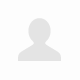
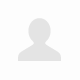

In [312]:
soup=BeautifulSoup(html, 'html.parser')
soup# _image _listImage 이제는 이게 많이 생김 

In [313]:
images = soup.find_all(class_ = '_image _listImage')
images

[<img alt='BTS 지민·정국 "고향 콘서트, 부산으로 모실 수 있어 영광" (옛투컴 인 부산)' class="_image _listImage" data-org-height="246" data-org-width="340" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F5129%2F2022%2F10%2F15%2F151657524_20221015193601580.jpg&amp;type=a340" style="height: 158px; opacity: 1;"/>,
 <img alt="전 세계 아미들 부산 집결" class="_image _listImage" data-org-height="506" data-org-width="340" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F003%2F2022%2F10%2F15%2FNISI20221015_0019359510_web_20221015162755_20221015180510935.jpg&amp;type=a340" style="height: 324px; opacity: 1;"/>,
 <img alt="Pin de camii camilia em BTS" class="_image _listImage" data-org-height="600" data-org-width="340" src="https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2Foriginals%2F9a%2Ff8%2Fd0%2F9af8d0f0ea5e9fd213815ffcee1b7863.jpg&amp;type=ofullfill340_600_png" style="height: 385px; opacity: 1;"/>,
 <img alt="Pin by lilShy.com on BTS | Albu

In [316]:
for image in images:
    print(image['src'])

https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F5129%2F2022%2F10%2F15%2F151657524_20221015193601580.jpg&type=a340
https://search.pstatic.net/common/?src=http%3A%2F%2Fimgnews.naver.net%2Fimage%2F003%2F2022%2F10%2F15%2FNISI20221015_0019359510_web_20221015162755_20221015180510935.jpg&type=a340
https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2Foriginals%2F9a%2Ff8%2Fd0%2F9af8d0f0ea5e9fd213815ffcee1b7863.jpg&type=ofullfill340_600_png
https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2F736x%2F2b%2F38%2Fc1%2F2b38c128a383097679f640e729cc0adb.jpg&type=ofullfill340_600_png
data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2Foriginals%2F8a%2F1c%2F61%2F8a1c61238b463282c0931c0a7238ddd5.jpg&type=a340
https://search.pstatic.net/sunny/?src=https%3A%2F%2Fi.pinimg.com%2F7

### 디렉토리 생성

In [317]:
import os

In [318]:
os.mkdir("bts")

## 이미지 파일 저장 

In [322]:
from urllib.request import urlopen, urlretrieve

In [321]:
count =0
for image in images:
    with urlopen(image['src']) as f:
        with open(f"./bts/{count}.jpg", "wb") as h:
            data=f.read()
            h.write(data)
            count +=1 
            

### urlretrieve 사용하기

In [ ]:
count =0
for image in images:
    urlretrieve(image['src'], f"./bts/{count}.jpg")
    count +=1 
        

### 한글 인식 quote_plus

In [323]:
from urllib.parse import quote_plus

In [324]:
url1='https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url2=quote_plus("블랙핑크")
url= url1 +url2
print(url)

https://search.naver.com/search.naver?where=image&sm=tab_jum&query=%EB%B8%94%EB%9E%99%ED%95%91%ED%81%AC


In [328]:
driver.get(url)

In [329]:
html=driver.page_source

soup=BeautifulSoup(html, 'html.parser')
soup# _image _listImage 이제는 이게 많이 생김 

images = soup.find_all(class_ = '_image _listImage')
images

count =0
for image in images:
    urlretrieve(image['src'], f"./bts/{count}.jpg")
    count +=1 

driver.close()

# ▶ 최소코드

In [336]:
import time

In [ ]:
driver =webdriver.Chrome("chromedriver.exe")

url1='https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url2=quote_plus("블랙핑크")
url= url1 +url2

driver.get(url)
#time.sleep(2)
driver.implicitly_wait(10) # 데이터 다받으면 10초 안기다리고 바로건너감 최대 10초임

html=driver.page_source
driver.close()

soup=BeautifulSoup(html, 'html.parser')
images = soup.find_all(class_ = '_image _listImage')

count =0
for image in images:
    urlretrieve(image['src'], f"./bts/{count}.jpg")
    count +=1 


In [ ]:
from selenium.webdriver.support.ui import WebDriverWait
 # 데이터 다받으면 10초 안기다리고 바로건너감 최대 10초임
wait = WebDriverWait(driver, 10

In [ ]:
html=request.urlopen(url).read()  # 네이버 
soup=BeautifulSoup(html, 'html.parser')
title1 = soup.find_all(class_ = "news_tit")


-------------------------------------------------------
html =requests.get(url).text # 네이버 
soup=BeautifulSoup(html,  'html.parser')
title1 = soup.find_all(class_ = "news_tit")

--------------------------------------------------------
header= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
html =requests.get(url, headers=header).text # 다음  
soup =BeautifulSoup(html, 'lxml')
title3 = soup.find_all(class_ = "tit_main fn_tit_u")

-----------------------------------------------
header= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36"}
html =requests.get(url, headers=header).text # 다음  
soup =BeautifulSoup(html3, 'lxml')
title3 = soup.select( ".tit_main.fn_tit_u")

------------------------------------------------------
start={i}1
int(str(11-1)+str(1))

p=str(i)
page =int(p[0])+1
--------------------------------------------
import requests
response = requests.get("https://www.naver.com")

print(response.status_code)


------------------------------------------------
import selenium
from selenium import webdriver #webdriver 구글 서치 후 다운
driver =webdriver.Chrome("chromedriver.exe")
url1='https://search.naver.com/search.naver?where=image&sm=tab_jum&query=bts'
driver.get(url1) # 이거하고 어느정도 받아올때까지 기다려야함
html=driver.page_source
driver.close()
soup=BeautifulSoup(html, 'html.parser')
images = soup.find_all(class_ = '_image _listImage')




--------------------------------------------------
count =0
for image in images:
    with urlopen(image['src']) as f:
        with open(f"./bts/{count}.jpg", "wb") as h:
            data=f.read()
            h.write(data)
            count +=1 
----------------------------------------------------------
count =0
for image in images:
    urlretrieve(image['src'], f"./bts/{count}.jpg")
    count +=1 
    
----------------------------------    
from urllib.parse import quote_plus
url1='https://search.naver.com/search.naver?where=image&sm=tab_jum&query='
url2=quote_plus("블랙핑크")
url= url1 +url2
driver.get(url)
html=driver.page_source
soup=BeautifulSoup(html, 'html.parser')
images = soup.find_all(class_ = '_image _listImage')


